In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
#Create path
path = '/Users/owner/Documents/Career foundry/Course 6'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'gun_violence_totals.csv'))

In [5]:
df_totals = pd.read_csv(os.path.join(path, 'Cleaned Data', 'total_injured_and_killed.csv'))

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
0,0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,2022,5,28,5,1
1,1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,2022,5,28,5,1
2,2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,2022,5,28,5,1
3,3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2022,5,28,5,2
4,4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,2022,5,28,5,1


In [7]:
df_totals.head()

,Unnamed: 0,state,people_killed,people_injured,total_hurt
0,0,Vermont,120,147,267
1,1,Wyoming,139,96,235
2,2,North Dakota,153,225,378
3,3,Rhode Island,161,581,742
4,4,Hawaii,170,191,361


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471986 entries, 0 to 471985
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      471986 non-null  int64 
 1   incident_id     471986 non-null  int64 
 2   date            471986 non-null  object
 3   state           471986 non-null  object
 4   city            471986 non-null  object
 5   address         448268 non-null  object
 6   people_killed   471986 non-null  int64 
 7   people_injured  471986 non-null  int64 
 8   year            471986 non-null  int64 
 9   month           471986 non-null  int64 
 10  monthday        471986 non-null  int64 
 11  day_of_week     471986 non-null  int64 
 12  hurt            471986 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 46.8+ MB


In [10]:
#Deleting non-numerical columns
df_n = df.drop(columns=['Unnamed: 0', 'date', 'state', 'city', 'address'])

In [11]:
df_n.head()

,incident_id,people_killed,people_injured,year,month,monthday,day_of_week,hurt
0,2314858,0,1,2022,5,28,5,1
1,2314409,0,1,2022,5,28,5,1
2,2314498,0,1,2022,5,28,5,1
3,2314485,0,2,2022,5,28,5,2
4,2314483,1,0,2022,5,28,5,1


In [13]:
df_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      51 non-null     int64 
 1   state           51 non-null     object
 2   people_killed   51 non-null     int64 
 3   people_injured  51 non-null     int64 
 4   total_hurt      51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [14]:
#Deleting non-numerical columns
df_totals_n = df_totals.drop(columns=['Unnamed: 0', 'state'])

In [15]:
df_totals_n.head()

,people_killed,people_injured,total_hurt
0,120,147,267
1,139,96,235
2,153,225,378
3,161,581,742
4,170,191,361


# Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_n).score(df_n) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/owner/anacond

[-2.004989323600049e+17,
 -4.8116072322453144e+16,
 -2.135117697748088e+16,
 -1.2209962114174638e+16,
 -7841227094751064.0,
 -5424556722892520.0,
 -3946049950075741.5,
 -3053573629487298.0,
 -2375102887736138.0]

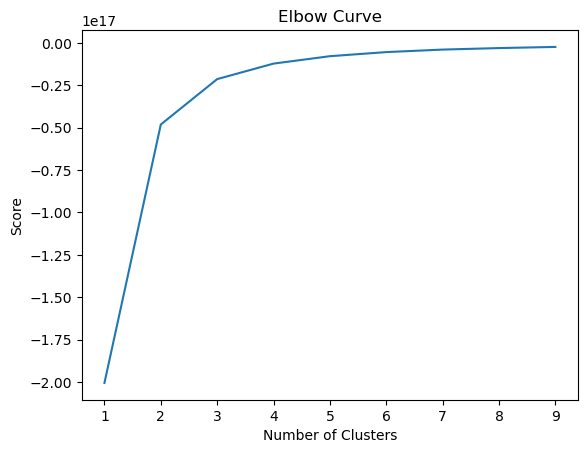

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters I choose is 3 because the curve rapidly slows at this number of clusters

# K-means clustering

In [20]:
kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
#Attaching a new column 'clusters'
df_n['clusters'] = kmeans.fit_predict(df_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df_n.head()

,incident_id,people_killed,people_injured,year,month,monthday,day_of_week,hurt,clusters
0,2314858,0,1,2022,5,28,5,1,0
1,2314409,0,1,2022,5,28,5,1,0
2,2314498,0,1,2022,5,28,5,1,0
3,2314485,0,2,2022,5,28,5,2,0
4,2314483,1,0,2022,5,28,5,1,0


In [24]:
df_n['clusters'].value_counts()

1    165531
0    155284
2    151171
Name: clusters, dtype: int64

# Plotting clusters

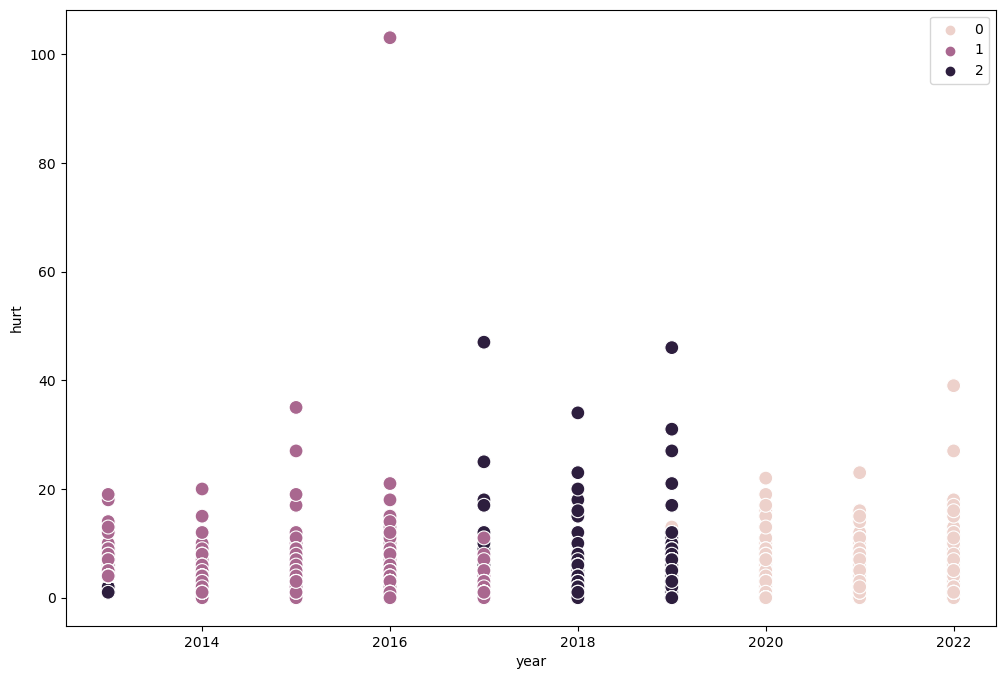

In [27]:
# Plot the clusters for the "Year" and "Total hurt" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['year'], y=df_n['hurt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('hurt') # Label y-axis.
plt.show()

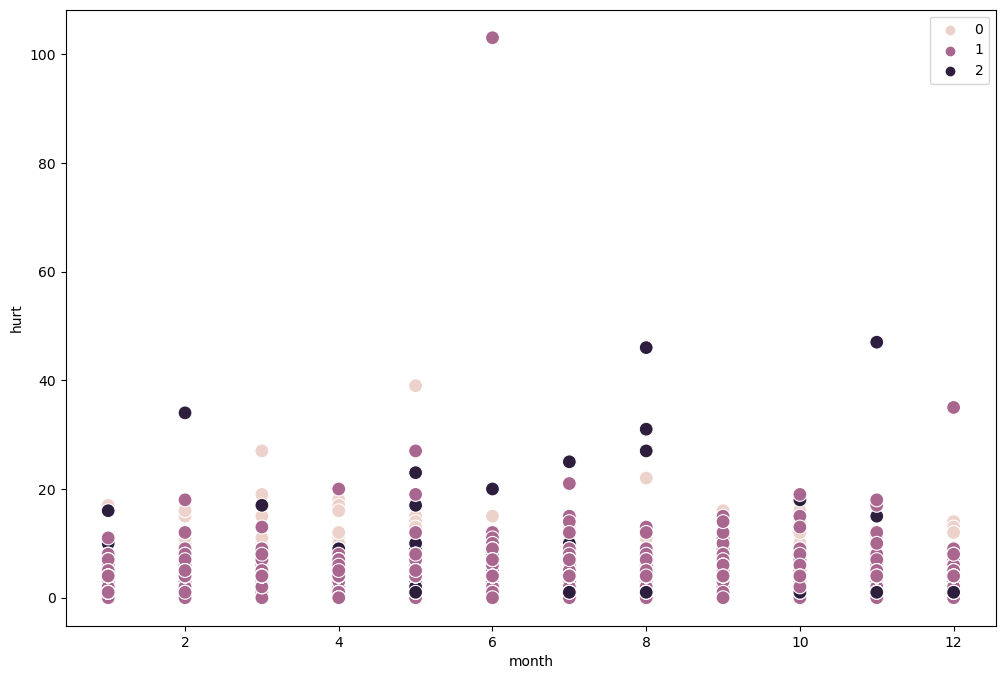

In [28]:
# Plot the clusters for the "Year" and "Total hurt" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['month'], y=df_n['hurt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('month') # Label x-axis.
plt.ylabel('hurt') # Label y-axis.
plt.show()

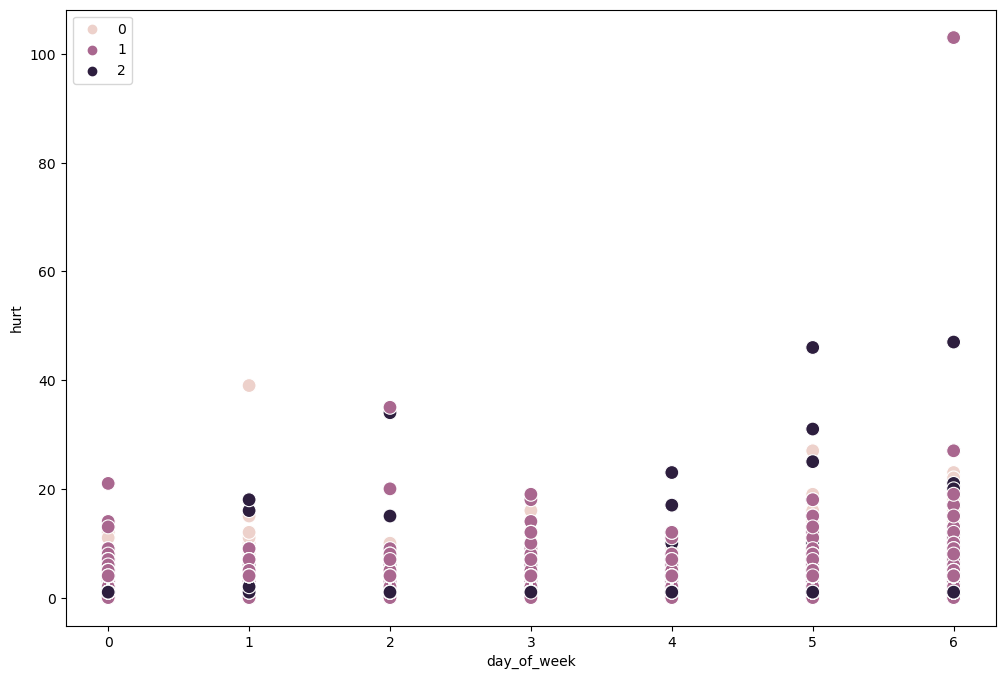

In [29]:
# Plot the clusters for the "day of week" and "Total hurt" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_n['day_of_week'], y=df_n['hurt'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('day_of_week') # Label x-axis.
plt.ylabel('hurt') # Label y-axis.
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 3) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(df_totals_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
#Attaching a new column 'clusters'
df_totals_n['clusters'] = kmeans.fit_predict(df_totals_n)

/Users/owner/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
df_totals_n.head()

,people_killed,people_injured,total_hurt,clusters
0,120,147,267,0
1,139,96,235,0
2,153,225,378,0
3,161,581,742,0
4,170,191,361,0


In [34]:
df_totals_n['clusters'].value_counts()

0    33
1    14
2     4
Name: clusters, dtype: int64

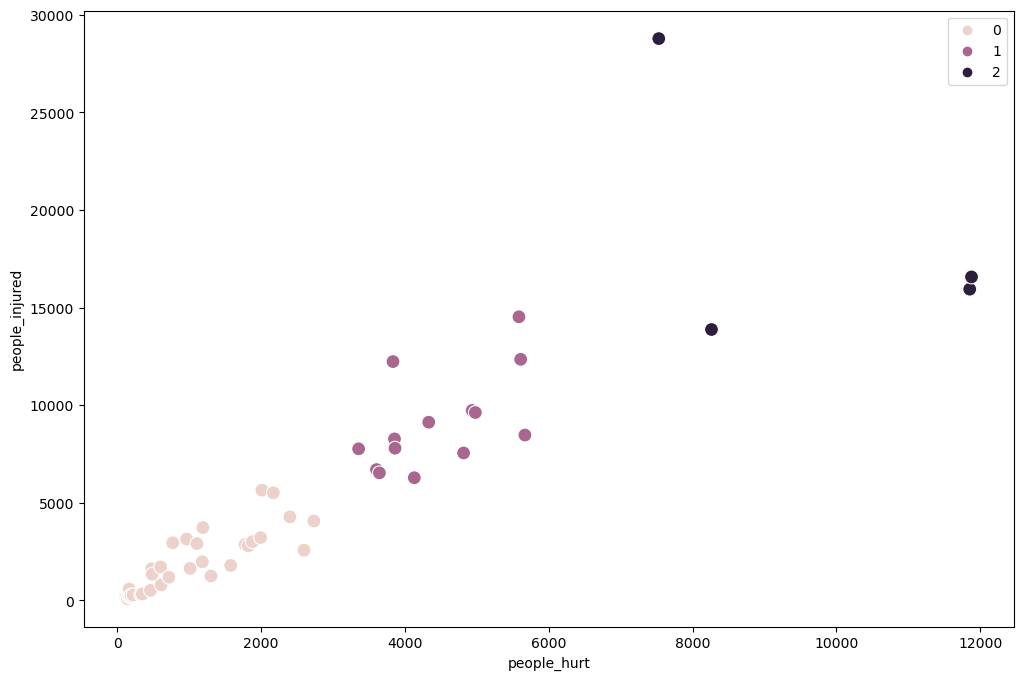

In [37]:
# Plot the clusters for the "People killed" and "People Injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_totals_n['people_killed'], y=df_totals_n['people_injured'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('people_hurt') # Label x-axis.
plt.ylabel('people_injured') # Label y-axis.
plt.show()

In [38]:
df_totals_n.loc[df_totals_n['clusters'] == 2, 'cluster'] = 'dark purple'
df_totals_n.loc[df_totals_n['clusters'] == 1, 'cluster'] = 'purple'
df_totals_n.loc[df_totals_n['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
df_totals_n.groupby('cluster').agg({'people_killed':['mean', 'median'], 
                         'people_injured':['mean', 'median'], 
                         'total_hurt':['mean', 'median']})

people_killed          people_injured             total_hurt  \
                     mean   median           mean   median          mean   
cluster                                                                    
dark purple   9882.000000  10059.0   18796.000000  16260.0  28678.000000   
pink          1024.666667    769.0    1915.939394   1646.0   2940.606061   
purple        4442.785714   4229.5    9072.500000   8375.0  13515.285714   

                      
              median  
cluster               
dark purple  28127.5  
pink          2556.0  
purple       12915.5

This form of analysis showed me various clusters for the total hurt chart and the original dataframe. It wasn't very fruitful for me with my analysis. However, I noticed that the third cluster chart shows me there were many people hurt on day 6 which is saturday. I also noticed that there is more people injured than killed in each state when looking at the mean number of people injured in each of the clusters. 